# Color histogram
Your code will take as input a color image *im* (a torch.Tensor with dtype torch.uint8 and shape (3, H, W)) and an integer *nbin*. It should compute a normalized color histogram of the image, quantized with nbin bins on each color plane.

The output should be a torch.Tensor with shape (3*nbin, ), containing the concatenation of the histograms computed on each color plane (in the same order of the input tensor).

The output should be L1-normalized (i.e. all bins of the final histogram should sum up to 1).

Quantization strategy: a pixel should go in the bin with index b iif: pixel*nbin // 256 == b

torch.Size([3, 400, 600])
119


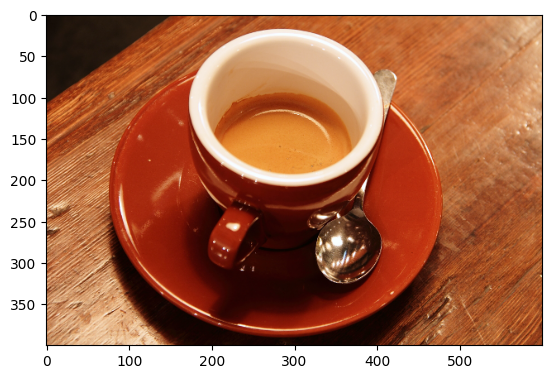

In [26]:
import random
import numpy as np
import torch
from skimage import data
import scipy
from matplotlib import pyplot as plt

im = data.coffee()
plt.imshow(im)
im = np.swapaxes(np.swapaxes(im, 0, 2), 1, 2)
im = torch.from_numpy(im)
print(im.shape)
nbin = random.randint(32,128)
print(nbin)


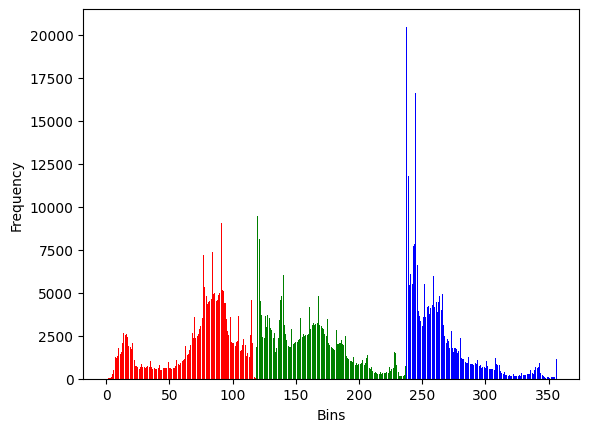

In [27]:
im = im.to(torch.float32)
hist = torch.zeros(3,nbin,)
for i in range(3):
    hist[i] = torch.histc(im[i], bins=nbin)

r = ['red' for x in range(nbin)]
g = ['green' for x in range(nbin)]
b = ['blue' for x in range(nbin)]
colors = r+g+b

hist = hist.flatten()
x = range(3*nbin)
plt.bar(x, hist, align='center',color=colors)
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()
